Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import bar_chart_race as bcr
import pycountry             
import operator
from collections import Counter
import warnings 

#### load the movie dataset and create their dataframes
data = pd.read_csv('movies.csv')
print('Shape: ',data.shape)
data.head(2)

Shape:  (4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage', 'overview', 'production_companies', 'original_title', 'title_y'] from the data set as they will not be used in the analysis.

#### Remove any duplicate rows

In [5]:
# code here
data = data.drop_duplicates()
print('Shape: ',data.shape)


Shape:  (4803, 20)


#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [6]:
# Code here
data = data[(data['revenue'] != 0) & (data['budget'] != 0)]
data = data.dropna()   # removinf rows with some missing values
print('Shape: ',data.shape)

Shape:  (1249, 20)


#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [7]:
# Change the release_date column to DateTime column

data['release_date'] = pd.to_datetime(data['release_date']) 

# Extract the release year from every release date
release_year = [item.year for item in data['release_date']]
data['release_year'] = release_year   # creating a new column

data.head(2)



,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007


#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [42]:
# code here
data['budget'] = data['budget'].astype(np.int64)
data['revenue'] = data['revenue'].astype(np.int64)

On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [14]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(data.index,data[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        data.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
parse_col_json('cast', 'name')
parse_col_json('production_countries', 'name')

data.head()

NameError: name 'json' is not defined

### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [82]:
# Code here
budget_df = data.sort_values('budget', ascending=False).set_index('title')
top_5_budget = budget_df.head(5)

top_5_budget




,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,
Pirates of the Caribbean: On Stranger Tides,380000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://disney.go.com/pirates/index-on-stranger...,1865,"[{""id"": 658, ""name"": ""sea""}, {""id"": 1316, ""nam...",en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,135.413856,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2011-05-14,1045713802,136.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Live Forever Or Die Trying.,6.4,4948
Pirates of the Caribbean: At World's End,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
Avengers: Age of Ultron,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,7.3,6767
Superman Returns,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,1452,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-06-28,391081192,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,5.4,1400
John Carter,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124


#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [81]:
# code here
top_5_prof = data[data['revenue'] > 0].sort_values(['budget', 'revenue']).set_index('title')
top_5_prof

# genre_df = data.sort_values('budget', ascending=False)[cols].set_index('genres')
# top_genre = genre_df.head(5)
# top_genre



,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,
Bats,0,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",NaN,10496,"[{""id"": 2766, ""name"": ""mutation""}, {""id"": 5155...",en,Bats,Genetically mutated bats escape and it's up to...,1.537859,"[{""name"": ""Destination Films"", ""id"": 769}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1999-10-22,10,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They will suck you dry,4.1,35
Tae Guk Gi: The Brotherhood of War,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,11658,"[{""id"": 41586, ""name"": ""archaeologist""}, {""id""...",ko,태극기 휘날리며,"In 1950, in South Korea, shoe-shiner Jin-tae L...",9.572705,"[{""name"": ""Showbox Entertainment"", ""id"": 11420}]","[{""iso_3166_1"": ""KR"", ""name"": ""South Korea""}]",2004-02-05,15,140.0,"[{""iso_639_1"": ""ko"", ""name"": ""\ud55c\uad6d\uc5...",Released,NaN,7.4,133
Lake of Fire,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,44260,[],en,Lake of Fire,An unflinching look at the how the battle over...,0.475748,[],[],2006-09-09,25,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Exploring the Issue that Divides the World,8.0,10
My Baby's Daddy,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,26710,"[{""id"": 17985, ""name"": ""birth""}, {""id"": 160946...",en,My Baby's Daddy,A trio of young men are forced to grow up quic...,4.480167,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-01-09,51,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,4.3,15
When Did You Last See Your Father?,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,45791,"[{""id"": 494, ""name"": ""father son relationship""...",en,And When Did You Last See Your Father?,The story of a son's conflicting memories of h...,1.939054,"[{""name"": ""Intandem Films"", ""id"": 2731}, {""nam...","[{""iso_3166_1"": ""IE"", ""name"": ""Ireland""}, {""is...",2007-10-05,92,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Between every father and his son there is a st...,6.9,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tangled,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,7.4,3330
Superman Returns,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,1452,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-06-28,391081192,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,5.4,1400
Avengers: Age of Ultron,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,7.3,6767


#### Find the most talked about movies. Sort the dataframe based on the popularity column.

In [39]:
popular_df = data.sort_values('popularity', ascending=False).set_index('popularity')
top_movie = popular_df.head(10)
top_movie

,budget,genres,homepage,id,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
popularity,,,,,,,,,,,,,,,,,,,
875.581305,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",http://www.minionsmovie.com/,211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...","[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-06-17,1156730962,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571
724.247784,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2014-11-05,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867
514.569956,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.foxmovies.com/movies/deadpool,293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-02-09,783112979,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Witness the beginning of a happy ending,Deadpool,7.4,10995
481.098624,170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",http://marvel.com/guardians,118340,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...","[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2014-07-30,773328629,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742
434.278564,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.madmaxmovie.com/,76341,"[{""id"": 2964, ""name"": ""future""}, {""id"": 3713, ...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-05-13,378858340,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What a Lovely Day.,Mad Max: Fury Road,7.2,9427
418.708552,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-06-09,1513528810,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662
271.972889,140000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneyvideos/liveaction/p...,22,"[{""id"": 911, ""name"": ""exotic island""}, {""id"": ...",en,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 17th-century pira...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-07-09,655011224,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Prepare to be blown out of the water.,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985
243.791743,170000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://w

#### Find Movies which are rated above 7



In [37]:
# Code here
top_7_rated = data[data['vote_average'] > 7].sort_values(['vote_average']).set_index('vote_average')

top_7_rated


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_count
vote_average,,,,,,,,,,,,,,,,,,,
7.1,13000000,"[{""id"": 35, ""name"": ""Comedy""}]",http://stvincent-movie.com/,239563,"[{""id"": 2604, ""name"": ""babysitter""}, {""id"": 60...",en,St. Vincent,A young boy whose parents just divorced finds ...,43.791745,"[{""name"": ""The Weinstein Company"", ""id"": 308},...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2014-10-09,54837234,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Love Thy Neighbor,St. Vincent,763
7.1,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",NaN,22617,[],en,Dinner Rush,Is it just another evening at the hugely popul...,1.096355,"[{""name"": ""Access Motion Picture Group"", ""id"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2000-09-01,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Dinner Rush,19
7.1,6000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,16158,[],en,The Wood,"In the panicky, uncertain hours before his wed...",5.537646,"[{""name"": ""MTV Films"", ""id"": 746}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1999-07-16,25059640,106.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,From best friends to best men.,The Wood,34
7.1,2000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",NaN,12109,"[{""id"": 635, ""name"": ""disc jockey""}, {""id"": 14...",en,It's All Gone Pete Tong,Its All Gone Pete Tong is a comedy following t...,3.911445,[],"[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2004-09-12,120620,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,It's All Gone Pete Tong,52
7.1,5000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...",NaN,323677,"[{""id"": 2070, ""name"": ""olympic games""}, {""id"":...",en,Race,Based on the incredible true story of Jesse Ow...,22.995100,"[{""name"": ""Forecast Pictures"", ""id"": 12686}, {...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2016-02-19,24804129,134.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The incredible true story of gold medal champi...,Race,478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.5,0,[],NaN,346081,[],en,Sardaarji,A ghost hunter uses bottles to capture trouble...,0.296981,[],"[{""iso_3166_1"": ""IN"", ""name"": ""India""}]",2015-06-26,0,0.0,[],Released,NaN,Sardaarji,2
10.0,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",1
10.0,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,1


#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

In [70]:
# Code here
  

gen_df = data.sort_values('revenue', ascending=False).set_index('release_date')
top_prof = gen_df
top_prof




,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
release_date,,,,,,,,,,,,,,,,,,,
2009-12-10,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1997-11-18,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1845034188,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562
2012-04-25,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776
2015-06-09,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1513528810,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662
2015-04-01,190000000,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}, {""iso_...",1506249360,137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-03-18,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,41248,[],fr,La Fille du RER,The Girl on the Train is a 2009 French drama f...,2.351706,"[{""name"": ""France 2 Cin\u00e9ma"", ""id"": 83}, {...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}]",0,105.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,The Girl on the Train,5.6,10
2009-02-28,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 9648, ...",NaN,291081,[],en,Red Riding: In the Year of Our Lord 1974,"It's Yorkshire in 1974, and fear, mistrust and...",7.247023,"[{""name"": ""Revolution Films"", ""id"": 163}, {""na...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",0,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"An epic tale of murder, corruption and obsession.",Red Riding: In the Year of Our Lord 1974,7.0,54
2008-03-25,6500000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",http://www.flammenogcitronen.dk/,8883,"[{""id"": 782, ""name"": ""assassin""}, {""id"": 792, ...",da,Flammen & Citronen,"During Nazi occupation, red-headed Bent Faursc...",7.028946,"[{""name"": ""Det Danske Filminstitut"", ""id"": 118...","[{""iso_3166_1"": ""CZ"", ""name"

#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

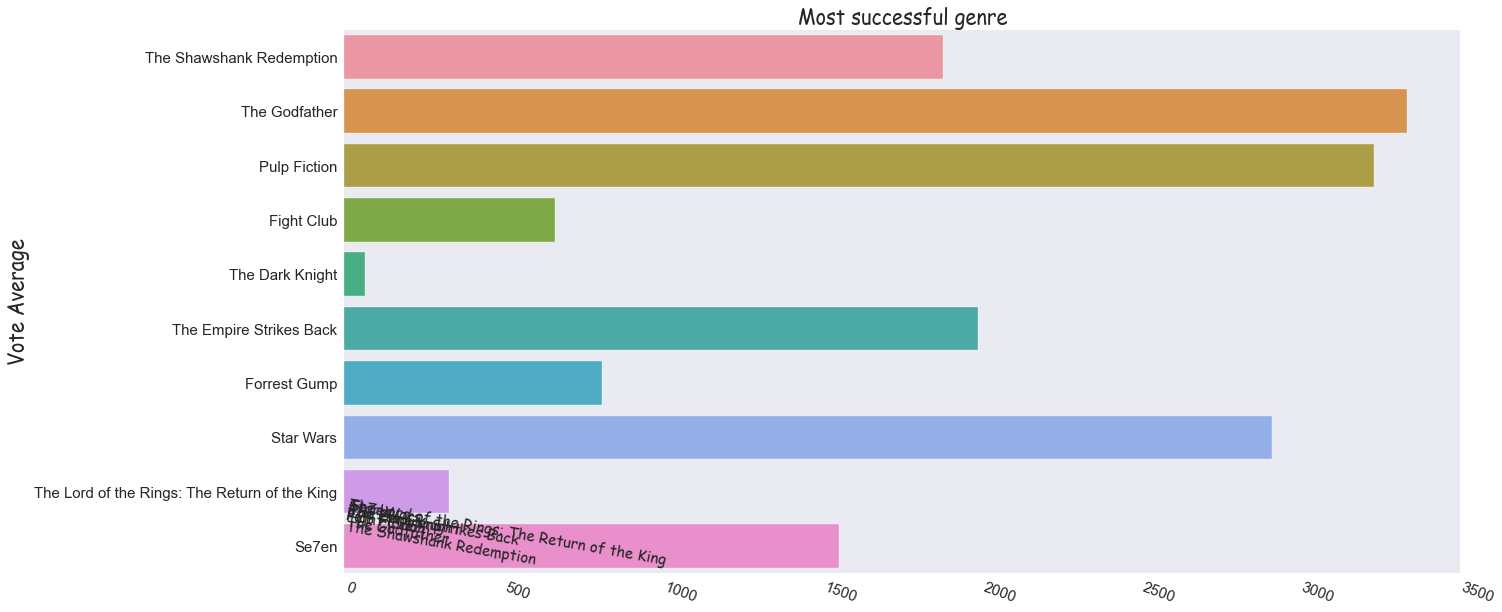

In [18]:
 # Code here
cond = (data.vote_count)>5000
ratings = data.loc[cond, ['title', 'vote_average']].sort_values('vote_average', ascending=False)
top_10_ratings = ratings.head(10)
fig, ax = plt.subplots(figsize=(20,10))
sns.set_style('dark')
sns.barplot(data=top_10_ratings, x=top_10_ratings.index, y='title');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('Movie Title', fontsize=15);
plt.title('Top 6 Highest Movies', fontsize=15);

for i, (title, vote) in enumerate(zip(top_10_ratings.title, top_10_ratings.vote_average)):
    _ = plt.text(i, vote, title, rotation=-10, va='top', ha='left', 
                 fontsize=15, fontfamily='fantasy');
plt.ylabel('Vote Average', fontsize=20, fontfamily='fantasy');
plt.title('Most successful genre', fontsize=20, fontfamily='fantasy')
plt.xlabel('');

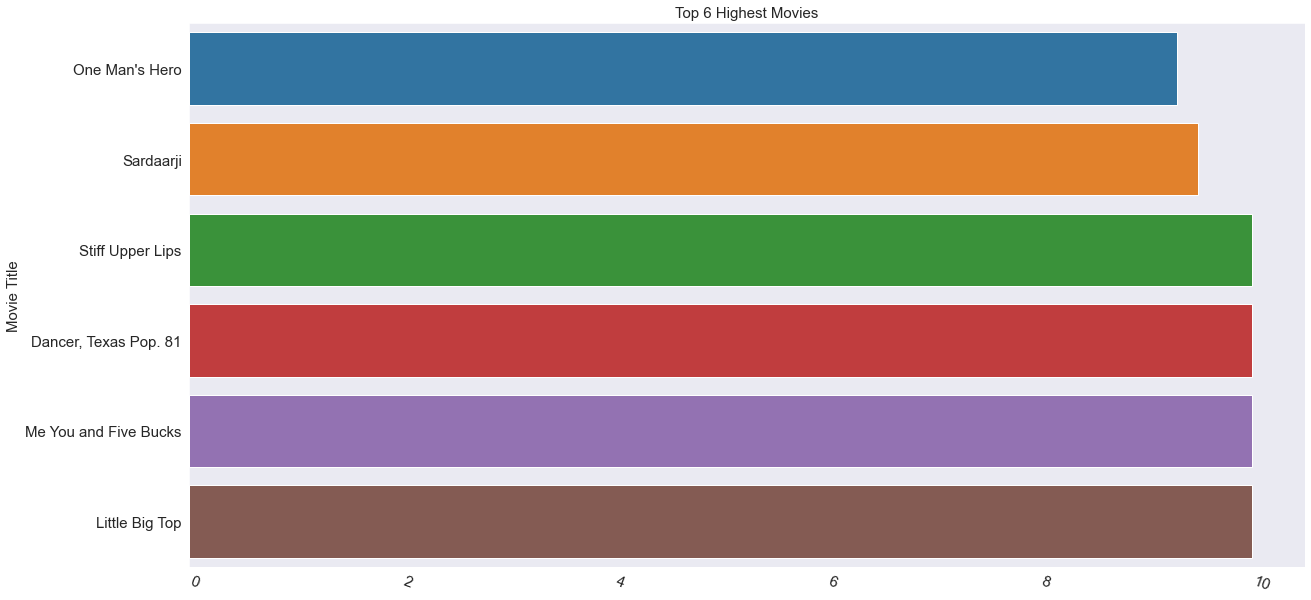

In [106]:
#### Generate three different interesting visualisations with a data story.


fig, ax = plt.subplots(figsize=(20,10))
sns.set_style('dark')
sns.barplot(data=top_rated, x=top_rated.index, y='title');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('Movie Title', fontsize=15);
plt.title('Top 6 Highest Movies', fontsize=15);






<ipython-input-11-3e3857b67fbf>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().legend(fontsize=15);


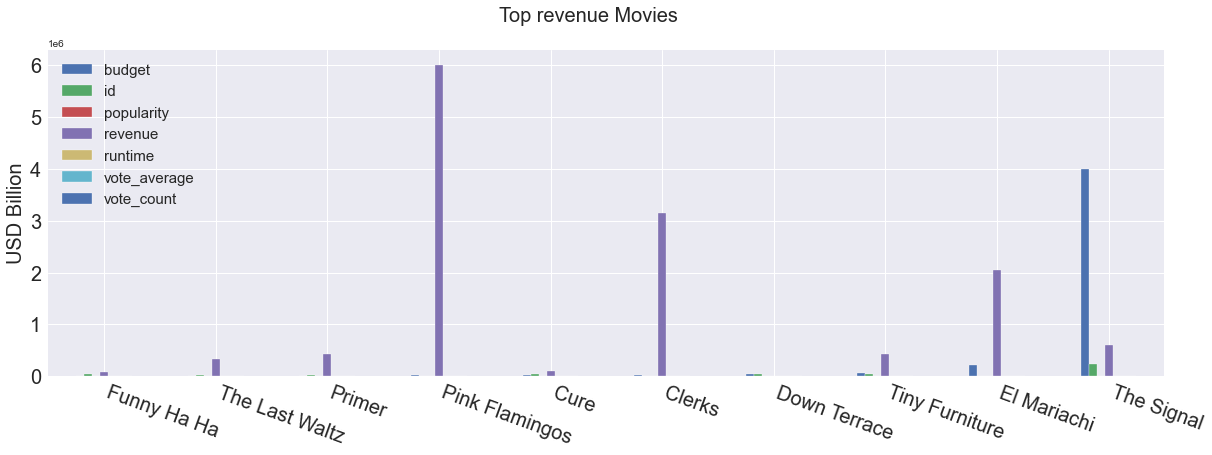

In [11]:
top_10_loss = data[data['revenue'] > 0].tail(10).sort_values(['budget', 'revenue']).set_index('title')

plt.style.use('seaborn')
top_10_loss.plot(kind='bar', figsize=(20,6), fontsize=20)
plt.ylabel('USD Billion', fontsize=20); plt.xlabel('')
plt.xticks(rotation=-20, ha='left')
plt.suptitle('Top revenue Movies', fontsize=20)
plt.axes().legend(fontsize=15);

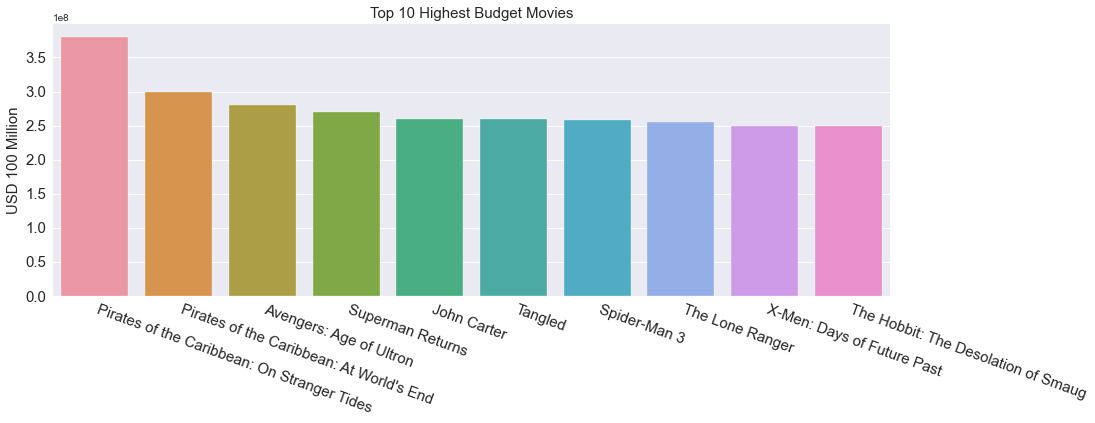

In [10]:
cols = ['title', 'budget']
budget_df = data.sort_values('budget', ascending=False)[cols].set_index('title')
top_10_budget = budget_df.head(10)

fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=top_10_budget, x=top_10_budget.index, y='budget');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('USD 100 Million', fontsize=15);
plt.title('Top 10 Highest Budget Movies', fontsize=15);

# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)